In [1]:
### Import library

import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
### Import dataset
data = pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
## menghitung jumlah tiap Species
data["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [4]:
## menampilkan info dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


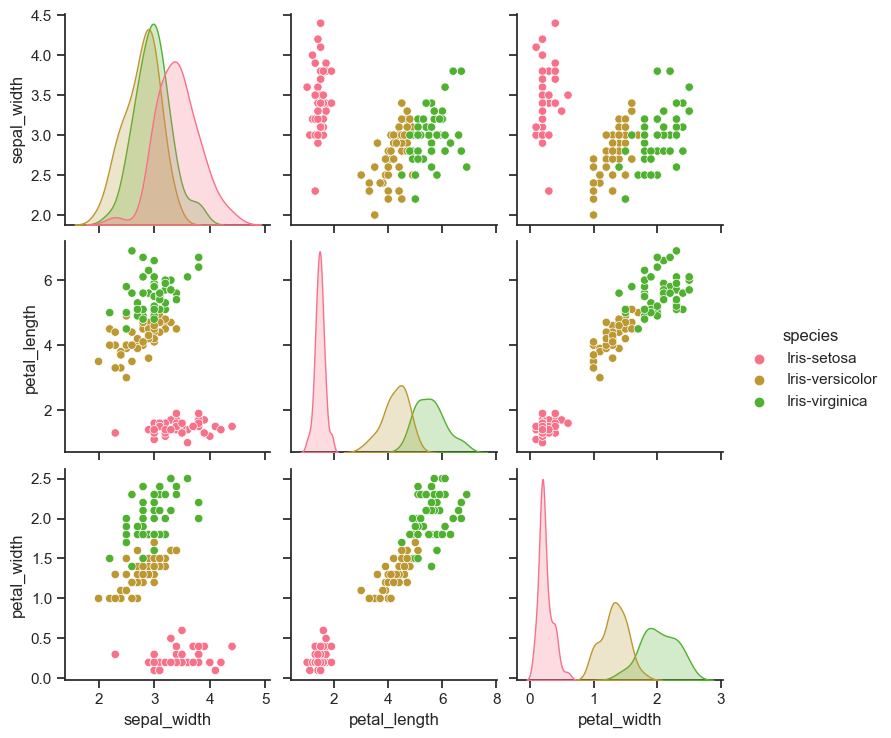

In [5]:
#Plotting the pairwise relationship of different parameters

import seaborn as sns
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(data.iloc[:,1:6],hue="species")

In [8]:
X = data.loc[:, data.columns != 'species']
y = data.loc[:, ['species']]

In [10]:
from sklearn.preprocessing import LabelEncoder
y_enc = LabelEncoder().fit_transform(y)
# Converting the label into a matrix form
y_label = keras.utils.to_categorical(y_enc)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.35)

In [12]:
print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")
print(X_train.shape[1:])

Train shape : (97, 4), Y Train : (97, 3)
(4,)


In [90]:
from keras.models import Sequential
from keras.layers import Dense
#Number of classes in the target variable
NB_CLASSES=3

#Create a sequencial model in Keras
model = keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(16,         #Number of nodes
                        input_shape=(4,), #Number of input variables
                        name='Hidden-Layer-1', #Logical name
                        activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(64,
                              name='Hidden-Layer-2',
                              activation='relu'))
#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-3',
                              activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

In [91]:
#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
#Print the model meta-data
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 16)                80        
                                                                 
 Hidden-Layer-2 (Dense)      (None, 64)                1088      
                                                                 
 Hidden-Layer-3 (Dense)      (None, 128)               8320      
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 9,875
Trainable params: 9,875
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.fit(X_train, y_train, batch_size=25, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 6ms/step - loss: 0.9960 - accuracy: 0.5258
Epoch 2/10
4/4 [==============================] - 0s 7ms/step - loss: 0.8704 - accuracy: 0.6701
Epoch 3/10
4/4 [==============================] - 0s 6ms/step - loss: 0.8023 - accuracy: 0.7526
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7134 - accuracy: 0.7216
Epoch 5/10
4/4 [==============================] - 0s 8ms/step - loss: 0.6649 - accuracy: 0.6907
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.5840 - accuracy: 0.7938
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 0.5339 - accuracy: 0.7423
Epoch 8/10
4/4 [==============================] - 0s 6ms/step - loss: 0.4884 - accuracy: 0.9691
Epoch 9/10
4/4 [==============================] - 0s 12ms/step - loss: 0.4650 - accuracy: 0.8144
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.4434 - accuracy: 0.9072


In [94]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.4092208445072174
Test accuracy: 0.9433962106704712


In [95]:
y_pred = model.predict(X_test)
y_pred

2/2 [==============================] - 0s 6ms/step


array([[0.02571047, 0.43818355, 0.53610593],
       [0.00943093, 0.30265942, 0.6879096 ],
       [0.9310066 , 0.05074646, 0.01824687],
       [0.91091084, 0.06550039, 0.0235888 ],
       [0.9376954 , 0.04631963, 0.01598491],
       [0.05896046, 0.51323587, 0.42780367],
       [0.01433945, 0.37805787, 0.6076026 ],
       [0.01327392, 0.36592156, 0.6208045 ],
       [0.02204067, 0.40294105, 0.5750183 ],
       [0.01348988, 0.42543972, 0.5610704 ],
       [0.8118844 , 0.13633278, 0.05178283],
       [0.90384334, 0.06982242, 0.02633417],
       [0.04098559, 0.4883949 , 0.47061956],
       [0.9148812 , 0.06318849, 0.02193028],
       [0.13394013, 0.55283225, 0.31322765],
       [0.05289514, 0.56361246, 0.38349244],
       [0.03191157, 0.43480593, 0.53328246],
       [0.9333525 , 0.04791338, 0.0187341 ],
       [0.9386411 , 0.04526787, 0.01609107],
       [0.8639262 , 0.0982515 , 0.0378224 ],
       [0.8739449 , 0.09204967, 0.03400543],
       [0.18061881, 0.5565922 , 0.26278898],
       [0.

In [96]:
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)
print(f"Actual: {actual}")
print(f"Predicted: {predicted}")

Actual: [2 2 0 0 0 1 2 2 2 2 0 0 1 0 1 1 1 0 0 0 0 1 2 2 0 2 2 2 1 0 1 2 0 1 1 0 1
 1 1 2 0 2 0 2 0 2 1 1 1 2 1 0 1]
Predicted: [2 2 0 0 0 1 2 2 2 2 0 0 1 0 1 1 2 0 0 0 0 1 2 2 0 2 2 2 1 0 1 2 0 2 2 0 1
 1 1 2 0 2 0 2 0 2 1 1 1 2 1 0 1]
